In [1]:
pip install opencv-python

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 6, Finished, Available)

     |████████████████████████████████| 62.2 MB 50 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 7, Finished, Available)

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()



StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 8, Finished, Available)

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 9, Finished, Available)

(60000, 28, 28)

In [5]:
y_train.shape

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 10, Finished, Available)

(60000,)

In [6]:

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)



StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 11, Finished, Available)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10)

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 12, Finished, Available)

2024-05-07 14:56:00.047795: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 14:56:01.591155: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-05-07 14:56:01.712334: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2095175000 Hz


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4197 - accuracy: 0.8735
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0949 - accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0418 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0327 - accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss

In [8]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 13, Finished, Available)

313/313 [==============================] - 1s 1ms/step - loss: 0.1043 - accuracy: 0.9771
0.10433021187782288
0.9771000146865845


In [9]:
model.save("digit_predict.h5")


StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 14, Finished, Available)

In [10]:
import seaborn as sn

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 15, Finished, Available)

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 16, Finished, Available)

Text(69.0, 0.5, 'Truth')

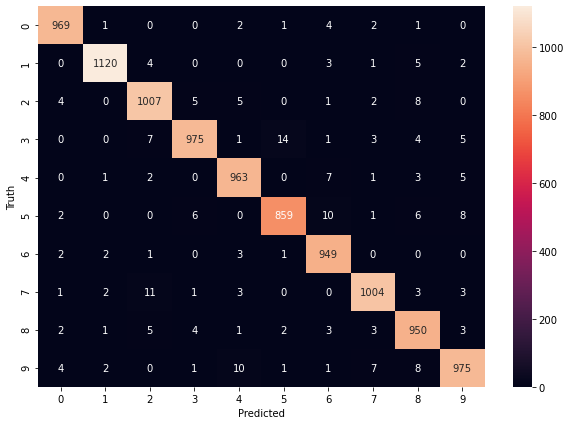

In [11]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 35, 17, Finished, Available)

The number is probably a 1


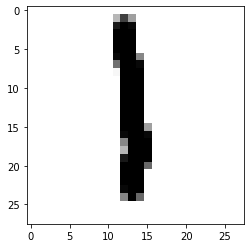

The number is probably a 2


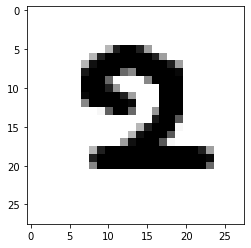

The number is probably a 3


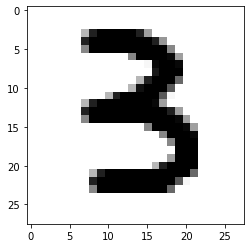

The number is probably a 4


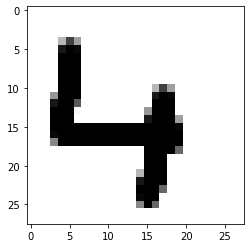

The number is probably a 5


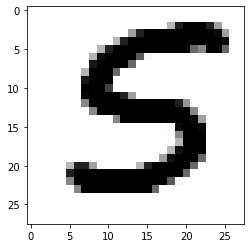

The number is probably a 6


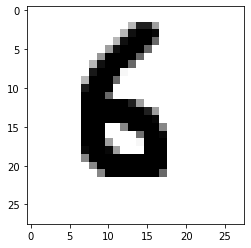

The number is probably a 7


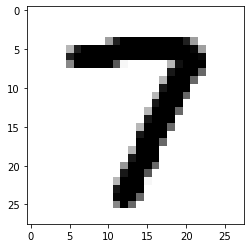

The number is probably a 8


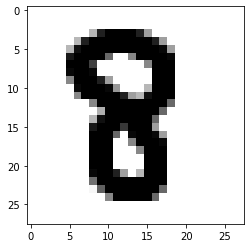

The number is probably a 1


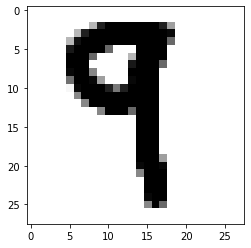

The number is probably a 0


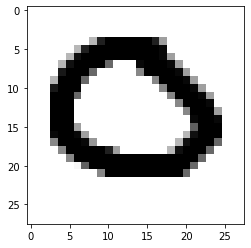

In [12]:
image_number = 1
while os.path.isfile('Users/vkoduru/digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('Users/vkoduru/digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1